### First: Import required packages

In [40]:
import numpy as np
import pandas as pd
import sys
import random
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score,recall_score,precision_score, roc_curve, precision_recall_curve, roc_auc_score
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import GridSearchCV
import math
np.set_printoptions(threshold=sys.maxsize)
pd.set_option('display.max_rows', None)

In [41]:
def evaluate_model(model,predicted_train, predicted_test):
    print("Train Accuracy :", accuracy_score(y_tr, predicted_train))
    print("Train recall :", recall_score(y_tr, predicted_train))
    print("Train precision :", precision_score(y_tr, predicted_train))

    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_ts, predicted_test))
    print("Test recall :", recall_score(y_ts, predicted_test))
    print("Test precision :", precision_score(y_ts, predicted_test))
    print("\n\t\t\t\t\t\tclassification report for training data\n")
    
    print(classification_report(y_tr, predicted_train))
    print("\n\t\t\t\t\t\tclassification report for test data\n")
    print(classification_report(y_ts, predicted_test))
    plot_confusion_matrix(model, X_tr, y_tr ,normalize='true')
    plot_confusion_matrix(model, X_ts, y_ts,normalize='true')
    plt.show()

    return accuracy_score(y_ts, predicted_test), recall_score(y_ts, predicted_test), precision_score(y_ts, predicted_test)

In [42]:
def get_dt_graph(classifier,features, labels):
    fig = plt.figure(figsize=(25,20))
    _ = tree.plot_tree(classifier,
                       feature_names=features,
                       class_names=labels,
                       filled=True)
    plt.show()                   


In [43]:
def plot_precision_recall_vs_thresholds(precisions, recalls, thresholds):
    rng = np.arange(0,1.1,0.05)
    plt.figure(figsize = (20,7))

    plt.xticks(rng)
    plt.yticks(rng)

    plt.plot(thresholds, precisions[:-1], "r--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "p--", label="Recall")
    plt.title("Precision-Recall vs Thresholds curve")
    plt.xlabel("Threshold")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.grid(b=True, which="both", axis="both", color='gray', linestyle='-', linewidth=1)
    plt.show()


In [56]:
def plot_roc(y_ts,predicted_ts_prob):

    no_skill_probs = [0 for _ in range(len(y_ts))]

    # calculate roc curve
    fpr, tpr, thresholds = roc_curve(y_ts, predicted_ts_prob)
    ns_fpr, ns_tpr, _ = roc_curve(y_ts, no_skill_probs)
    # calculate AUC
    auc = roc_auc_score(y_ts, predicted_ts_prob)
    no_skill_auc = roc_auc_score(y_ts, no_skill_probs)
    print('AUC: %.4f' % auc)
    print('No Skill AUC: %.4f' % no_skill_auc)

    # plot the roc curve for the model
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', lw=2)
    plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)" % auc, lw=2)

    plt.title("Receiver operating characteristic _ SVM")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    plt.legend()



### Second make class called prepare_data

In [45]:
class prepare_data:
    def __init__(self,data) -> None:
        self.data = data
        self.y = self.data.values[:,-1]
        plt.figure(figsize = (20,7))
        sns.heatmap(df.corr(), annot = True, cmap="rainbow")
        plt.show()
    def one_hot_encoding(self,features=None):
        self.OHE_data = pd.get_dummies(self.data.iloc[:,:-1], columns=features)
        self.X = self.OHE_data.values
        
        return self.OHE_data
    def divid_to_tr_ts_val(self):
        #self.X.shape[0] number of rows in whole dataset you can also use self.y.shape[0] instead
        rand = random.sample(range(self.X.shape[0]), self.X.shape[0])
        train, test = np.split(rand, [int(.75*len(rand))])
          
        X_tr = self.X[train]
        y_tr = self.y[train]
        X_ts = self.X[test]
        y_ts = self.y[test]
        return X_tr,X_ts, y_tr,y_ts 

In [46]:
df = pd.read_csv('data.csv',index_col='Unnamed: 0')

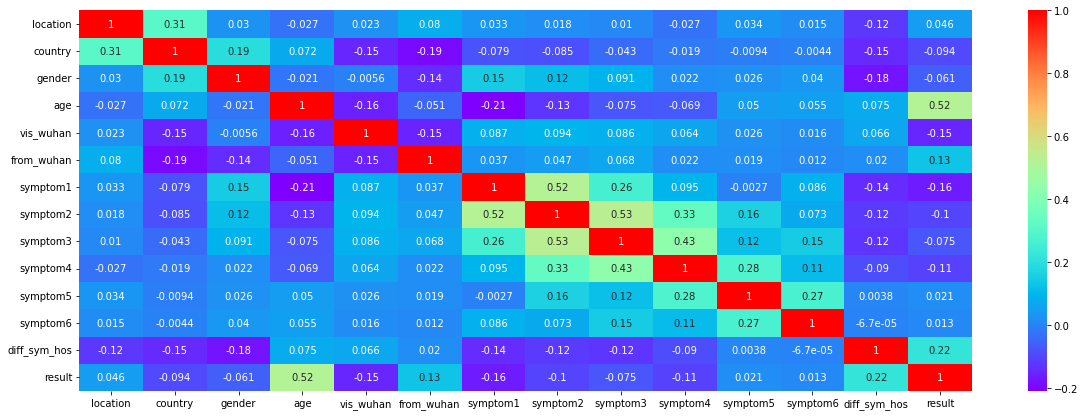

In [47]:
obj = prepare_data(df)
col_name = np.array(df.columns,dtype='str')
OHE_DF = obj.one_hot_encoding([col_name[2],col_name[6],col_name[7],col_name[8],col_name[9]])
X_tr,X_ts, y_tr,y_ts = obj.divid_to_tr_ts_val()
y_tr_unique = sorted(np.unique(np.array(y_tr,dtype='str')))

### Build decision tree classifier

DecisionTreeClassifier()
Fitting 5 folds for each of 50 candidates, totalling 250 fits
DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5)
Train Accuracy : 0.9721792890262752
Train recall : 0.84
Train precision : 0.9130434782608695
--------------------------------------------------
Test Accuracy : 0.9537037037037037
Test recall : 0.8787878787878788
Test precision : 0.8285714285714286

						classification report for training data

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98       572
         1.0       0.91      0.84      0.87        75

    accuracy                           0.97       647
   macro avg       0.95      0.91      0.93       647
weighted avg       0.97      0.97      0.97       647


						classification report for test data

              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97       183
         1.0       0.83      0.88      0.85        33

    

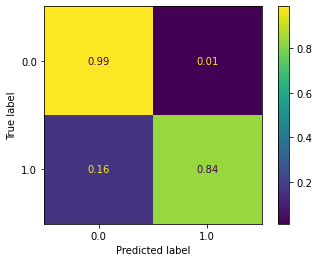

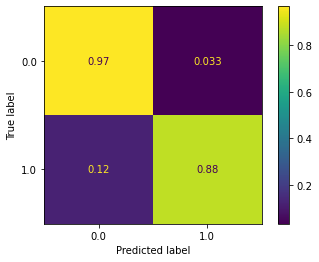

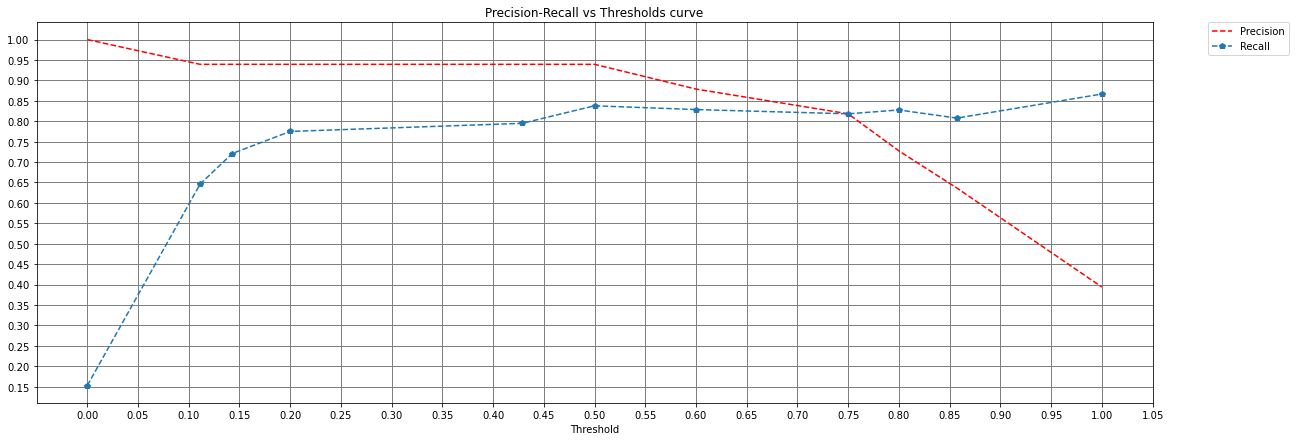

AUC: 0.9509
No Skill AUC: 0.5000


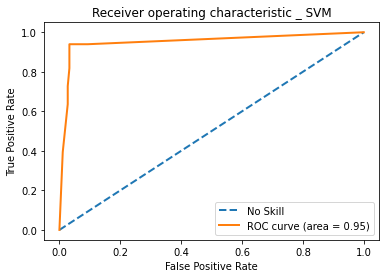

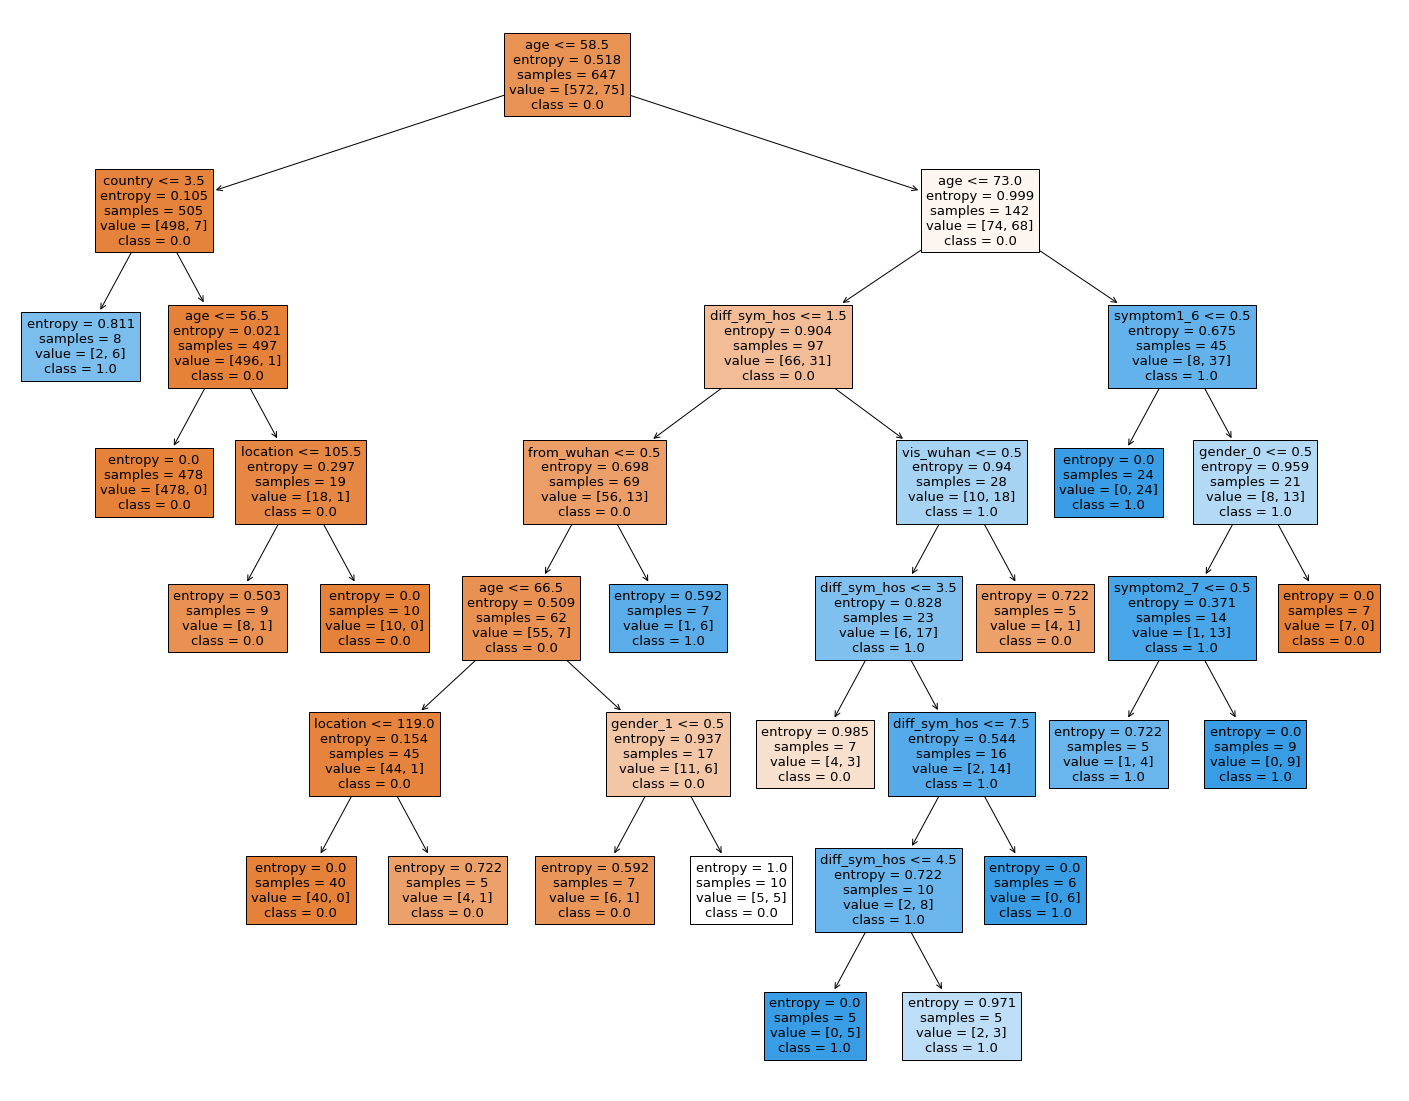

In [48]:
decision_tree_params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["entropy", "gini"]
}
model = DecisionTreeClassifier()
print(model)

grid_search = GridSearchCV(estimator=model, 
                            param_grid=decision_tree_params, 
                            cv=5, n_jobs=-1, verbose=1, scoring = "accuracy")


grid_search.fit(X_tr,y_tr)


score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()
predicted_test = grid_search.predict(X_ts)
predicted_train = grid_search.predict(X_tr)

predicted_test_proba = grid_search.predict_proba(X_ts)

print(grid_search.best_estimator_)

accuracy, recall, precision = evaluate_model(grid_search.best_estimator_,predicted_train,predicted_test) 


recalls, precisions, thresholds = precision_recall_curve(y_ts, predicted_test_proba[:,1])
plot_precision_recall_vs_thresholds(precisions,recalls,thresholds)
plot_roc(y_ts, predicted_test_proba[:,1])
plt.show()
plt.show()
get_dt_graph(grid_search.best_estimator_,OHE_DF.columns, y_tr_unique)



### Build KNN classifier

KNeighborsClassifier(leaf_size=1, n_jobs=-1, n_neighbors=25, weights='distance')
Train Accuracy : 1.0
Train recall : 1.0
Train precision : 1.0
--------------------------------------------------
Test Accuracy : 0.9305555555555556
Test recall : 0.5757575757575758
Test precision : 0.95

						classification report for training data

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       572
         1.0       1.00      1.00      1.00        75

    accuracy                           1.00       647
   macro avg       1.00      1.00      1.00       647
weighted avg       1.00      1.00      1.00       647


						classification report for test data

              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96       183
         1.0       0.95      0.58      0.72        33

    accuracy                           0.93       216
   macro avg       0.94      0.79      0.84       216
weighted avg       0.93  

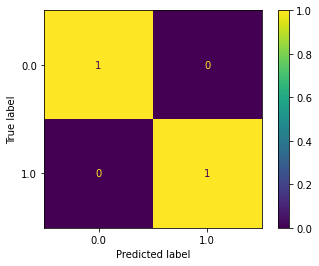

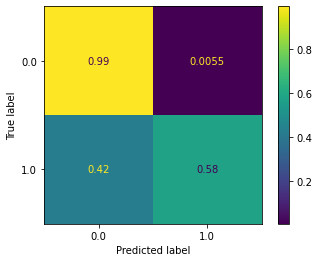

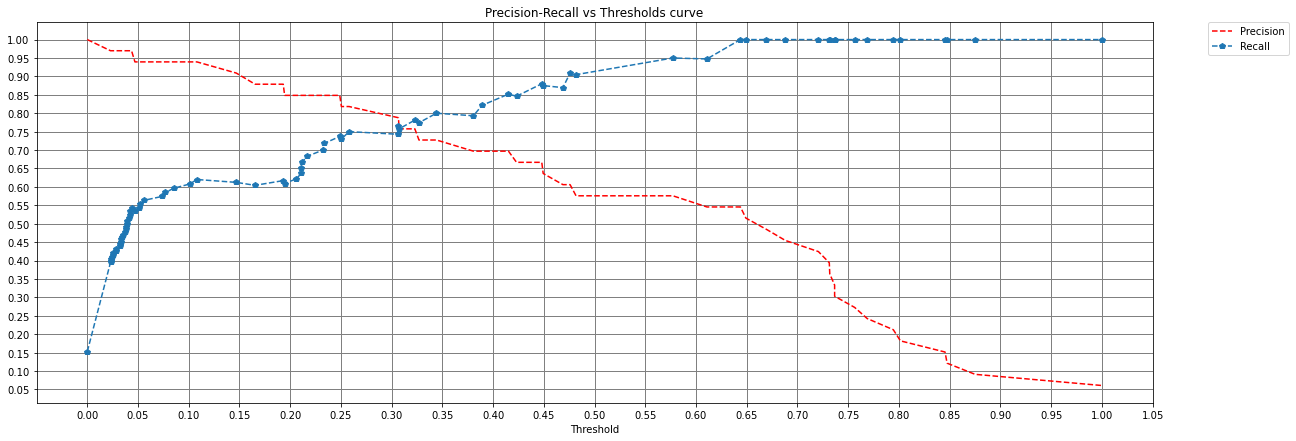

AUC: 0.9583
No Skill AUC: 0.5000


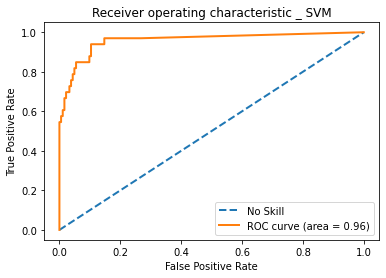

In [49]:
n_neighbors = [round(math.sqrt(X_tr.shape[0]))]
p=[1,2]
#Convert to dictionary
n_neighbors_paras = {'leaf_size': np.arange(1,50).tolist(),
'weights': ['uniform', 'distance'],
'algorithm':['auto'],
'n_neighbors':n_neighbors,
'p':p,
'n_jobs': [-1]}
knn_clf = KNeighborsClassifier(n_jobs=-1)
gridsearch_clf = GridSearchCV(knn_clf, n_neighbors_paras, cv=4)

gridsearch_clf.fit(X_tr, y_tr)
knn_predicted_test = gridsearch_clf.predict(X_ts)
knn_predicted_train = gridsearch_clf.predict(X_tr)
knn_predicted_test_proba = gridsearch_clf.predict_proba(X_ts)

score_df = pd.DataFrame(gridsearch_clf.cv_results_)
score_df.head()

print(gridsearch_clf.best_estimator_)

accuracy, recall, precision = evaluate_model(gridsearch_clf.best_estimator_,knn_predicted_train,knn_predicted_test) 

knn_recalls, knn_precisions, knn_thresholds = precision_recall_curve(y_ts, knn_predicted_test_proba[:,1])
plot_precision_recall_vs_thresholds(knn_precisions,knn_recalls,knn_thresholds)
plt.show()
plot_roc(y_ts, knn_predicted_test_proba[:,1])
plt.show()


LogisticRegression(C=1, max_iter=10000, random_state=0, solver='liblinear')
Train Accuracy : 0.9613601236476044
Train recall : 0.7466666666666667
Train precision : 0.9032258064516129
--------------------------------------------------
Test Accuracy : 0.9351851851851852
Test recall : 0.6666666666666666
Test precision : 0.88

						classification report for training data

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       572
         1.0       0.90      0.75      0.82        75

    accuracy                           0.96       647
   macro avg       0.94      0.87      0.90       647
weighted avg       0.96      0.96      0.96       647


						classification report for test data

              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96       183
         1.0       0.88      0.67      0.76        33

    accuracy                           0.94       216
   macro avg       0.91      0.83      

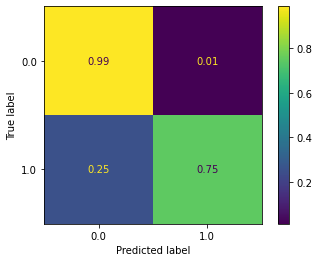

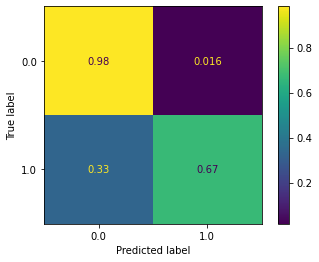

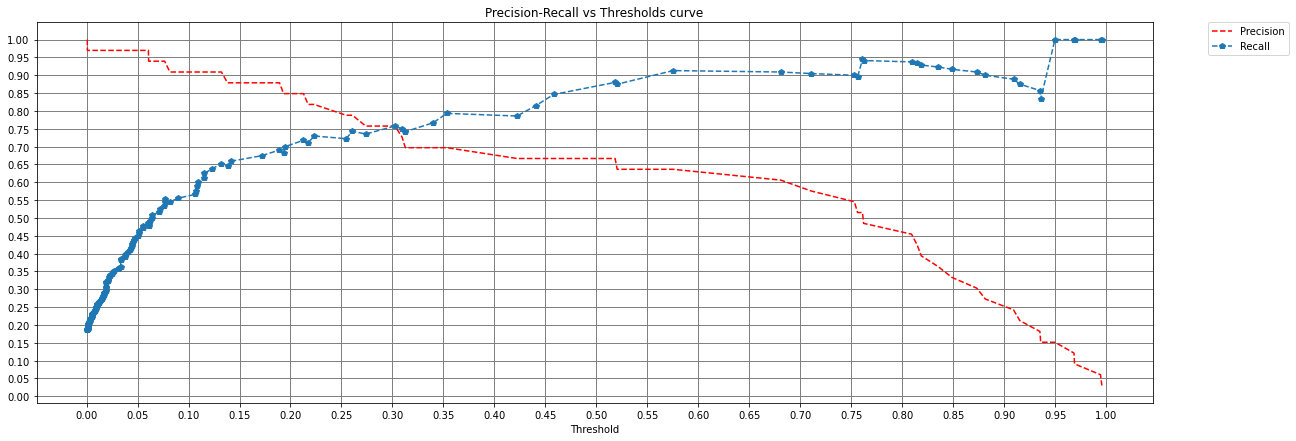

AUC: 0.9497
No Skill AUC: 0.5000


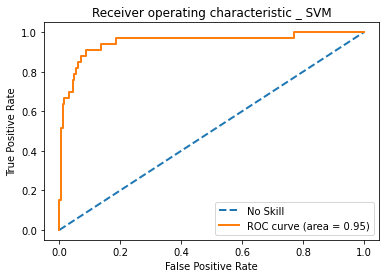

In [50]:
log_classifier = LogisticRegression(random_state = 0)
logistic_reg_paras = {'penalty':['l2'],'C':[1e5,1e4,1e3,1e2,10,1,0.5,0.1,0.01,0.05,0.0001,0.0005],'solver':["liblinear"],'max_iter' : [10000]}
gridsearch_clf = GridSearchCV(log_classifier,logistic_reg_paras, cv=4)

gridsearch_clf.fit(X_tr, y_tr)
log_predicted_test = gridsearch_clf.predict(X_ts)
log_predicted_train = gridsearch_clf.predict(X_tr)
log_predicted_test_proba = gridsearch_clf.predict_proba(X_ts)

score_df = pd.DataFrame(gridsearch_clf.cv_results_)
score_df.head()

print(gridsearch_clf.best_estimator_)

accuracy, recall, precision = evaluate_model(gridsearch_clf.best_estimator_,log_predicted_train,log_predicted_test) 

log_recalls, log_precisions, log_thresholds = precision_recall_curve(y_ts, log_predicted_test_proba[:,1])
plot_precision_recall_vs_thresholds(log_precisions,log_recalls,log_thresholds)
plt.show()
plot_roc(y_ts, log_predicted_test_proba[:,1])
plt.show()


## Gaussian naive classifier

GaussianNB()
Train Accuracy : 0.17619783616692428
Train recall : 1.0
Train precision : 0.12335526315789473
--------------------------------------------------
Test Accuracy : 0.18981481481481483
Test recall : 0.9393939393939394
Test precision : 0.15196078431372548

						classification report for training data

              precision    recall  f1-score   support

         0.0       1.00      0.07      0.13       572
         1.0       0.12      1.00      0.22        75

    accuracy                           0.18       647
   macro avg       0.56      0.53      0.17       647
weighted avg       0.90      0.18      0.14       647


						classification report for test data

              precision    recall  f1-score   support

         0.0       0.83      0.05      0.10       183
         1.0       0.15      0.94      0.26        33

    accuracy                           0.19       216
   macro avg       0.49      0.50      0.18       216
weighted avg       0.73      0.19      0.13  

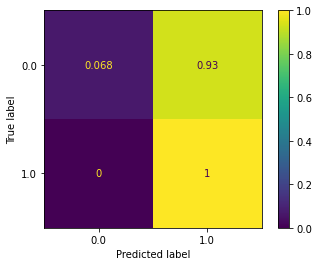

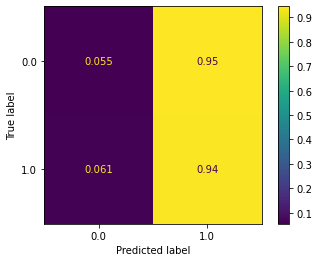

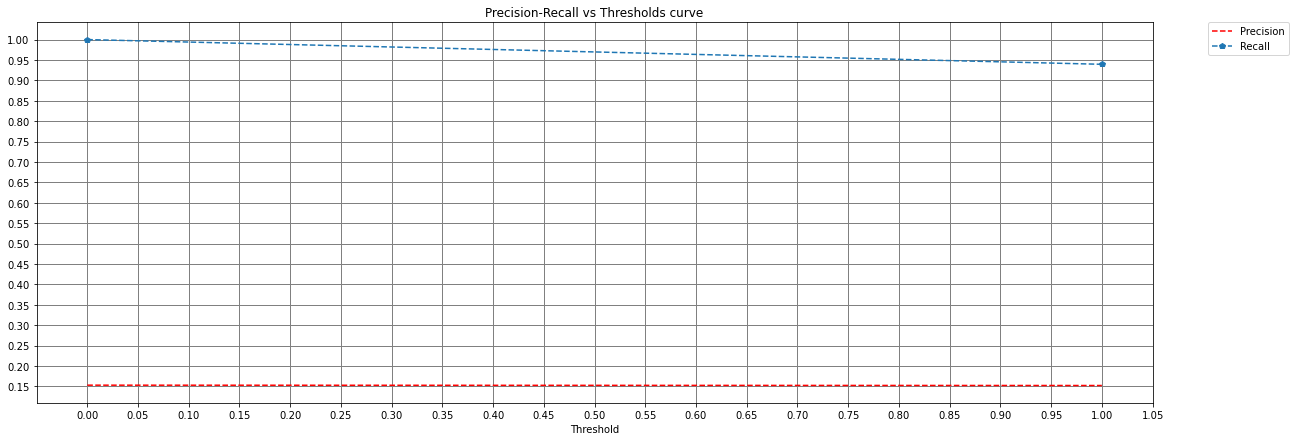

AUC: 0.4970
No Skill AUC: 0.5000


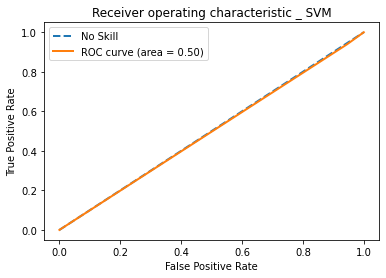

In [51]:
gaussian_classifier = GaussianNB()
gaussian_paras = {}
gridsearch_clf = GridSearchCV(gaussian_classifier,gaussian_paras, cv=4)

gridsearch_clf.fit(X_tr, y_tr)
gauss_predicted_test = gridsearch_clf.predict(X_ts)
gauss_predicted_train = gridsearch_clf.predict(X_tr)
gauss_predicted_test_proba = gridsearch_clf.predict_proba(X_ts)

score_df = pd.DataFrame(gridsearch_clf.cv_results_)
score_df.head()

print(gridsearch_clf.best_estimator_)

accuracy, recall, precision = evaluate_model(gridsearch_clf.best_estimator_,gauss_predicted_train,gauss_predicted_test) 

gauss_recalls, gauss_precisions, gauss_thresholds = precision_recall_curve(y_ts, gauss_predicted_test_proba[:,1])
plot_precision_recall_vs_thresholds(gauss_recalls,gauss_precisions,gauss_thresholds)
plt.show()
plot_roc(y_ts, gauss_predicted_test_proba[:,1])
plt.show()

### SVM scikit learn

SVC(C=0.1, gamma=0.1, kernel='linear', probability=True)
Train Accuracy : 0.9613601236476044
Train recall : 0.7466666666666667
Train precision : 0.9032258064516129
--------------------------------------------------
Test Accuracy : 0.9398148148148148
Test recall : 0.6666666666666666
Test precision : 0.9166666666666666

						classification report for training data

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       572
         1.0       0.90      0.75      0.82        75

    accuracy                           0.96       647
   macro avg       0.94      0.87      0.90       647
weighted avg       0.96      0.96      0.96       647


						classification report for test data

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97       183
         1.0       0.92      0.67      0.77        33

    accuracy                           0.94       216
   macro avg       0.93      0.83      0.87 

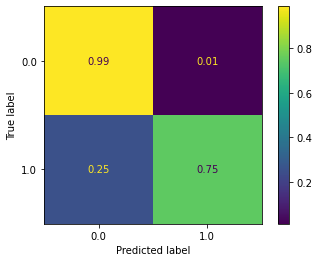

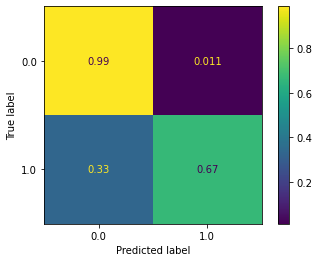

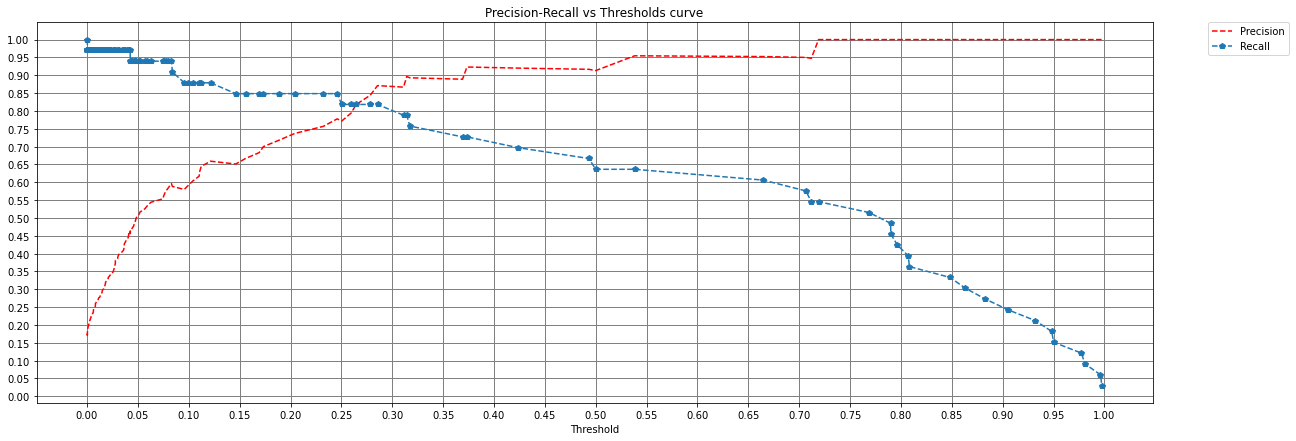

AUC: 0.9543
No Skill AUC: 0.5000


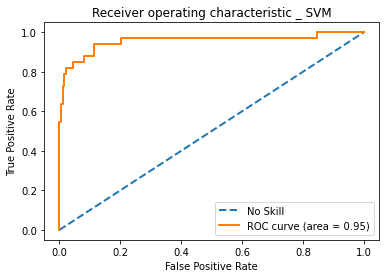

In [53]:
svm_param_grid = {
    'C': [0.001, 0.01, 0.1],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [3],
    'gamma': [0.1, 0.5]
}
SVM = svm.SVC(probability=True)
grid = GridSearchCV(SVM, svm_param_grid)
grid.fit(X_tr,y_tr)

svm_predicted_test = grid.predict(X_ts)
svm_predicted_train = grid.predict(X_tr)
svm_predicted_test_proba = grid.predict_proba(X_ts)

score_df = pd.DataFrame(grid.cv_results_)
score_df.head()

print(grid.best_estimator_)

accuracy, recall, precision = evaluate_model(grid.best_estimator_,svm_predicted_train,svm_predicted_test) 

svm_recalls, svm_precisions, svm_thresholds = precision_recall_curve(y_ts, svm_predicted_test_proba[:,1])
plot_precision_recall_vs_thresholds(svm_recalls,svm_precisions,svm_thresholds)
plt.show()
plot_roc(y_ts, svm_predicted_test_proba[:,1])
plt.show()


## Result and comparison

AUC: 0.9509
No Skill AUC: 0.5000
AUC: 0.9583
No Skill AUC: 0.5000
AUC: 0.9497
No Skill AUC: 0.5000
AUC: 0.4970
No Skill AUC: 0.5000
AUC: 0.9543
No Skill AUC: 0.5000


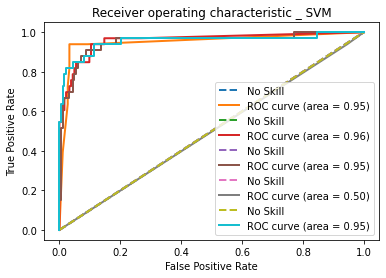

In [57]:
plot_roc(y_ts, predicted_test_proba[:,1])
plot_roc(y_ts, knn_predicted_test_proba[:,1])
plot_roc(y_ts, log_predicted_test_proba[:,1])
plot_roc(y_ts, gauss_predicted_test_proba[:,1])
plot_roc(y_ts, svm_predicted_test_proba[:,1])
plt.show()